LIBRARYY

In [1751]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , classification_report
from sklearn.preprocessing import MinMaxScaler,StandardScaler 
import warnings
from termcolor  import colored
import seaborn as sns 
import numpy as np 

In [1752]:
warnings.filterwarnings('ignore')

DATASET LOAD

In [1753]:
try:
    loan_data = pd.read_csv("train.csv")
    print(colored("THE DATASET LOADED SUCCESSFULLY...", "green", attrs=['reverse']))

except FileNotFoundError:
    print(colored("ERROR: File not found!", "red", attrs=['reverse']))

except Exception as e:
    print(colored(f"ERROR: {e}", "red", attrs=['reverse']))

THE DATASET LOADED SUCCESSFULLY...


In [1754]:
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


DATASET ROWS

In [1755]:
loan_data_rows = loan_data.head(3) 

print(colored('As you can see, the first 3 rows in the dataset:\n', 'green', attrs=['reverse']))

for index, row in loan_data_rows.iterrows():
    print(colored(f"Row {index + 1} : ","white") )
    print(row)
    print("------------------------------------")

As you can see, the first 3 rows in the dataset:

Row 1 : 
Loan_ID              LP001002
Gender                   Male
Married                    No
Dependents                  0
Education            Graduate
Self_Employed              No
ApplicantIncome          5849
CoapplicantIncome         0.0
LoanAmount                NaN
Loan_Amount_Term        360.0
Credit_History            1.0
Property_Area           Urban
Loan_Status                 Y
Name: 0, dtype: object
------------------------------------
Row 2 : 
Loan_ID              LP001003
Gender                   Male
Married                   Yes
Dependents                  1
Education            Graduate
Self_Employed              No
ApplicantIncome          4583
CoapplicantIncome      1508.0
LoanAmount              128.0
Loan_Amount_Term        360.0
Credit_History            1.0
Property_Area           Rural
Loan_Status                 Y
Name: 1, dtype: object
------------------------------------
Row 3 : 
Loan_ID              LP

PARAMETRES OF DATASET

In [1756]:
print("The shape =", loan_data.shape)


num_rows, num_cols = loan_data.shape
num_features = num_cols - 1
num_data = num_rows * num_cols

print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_cols}")
print(f"Number of Features: {num_features}")
print(f"Number of All Data: {num_data}")



The shape = (614, 13)
Number of Rows: 614
Number of Columns: 13
Number of Features: 12
Number of All Data: 7982


INFORMATION OF DATASET

In [1757]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [1758]:
loan_data['LoanAmount'].notnull

<bound method Series.notnull of 0        NaN
1      128.0
2       66.0
3      120.0
4      141.0
       ...  
609     71.0
610     40.0
611    253.0
612    187.0
613    133.0
Name: LoanAmount, Length: 614, dtype: float64>

In [1759]:
loan_data.describe().T.round(2)  #round for number of decimal places that upto 2 

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.46,6109.04,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.25,2926.25,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.41,85.59,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.00,65.12,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.84,0.36,0.0,1.0,1.0,1.00,1.0


In [1760]:
loan_data.describe(include=object) #include object give data of categorial columns 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,428


VISUALIZING DATA

Gender
Male      489
Female    112
NaN        13
Name: count, dtype: int64


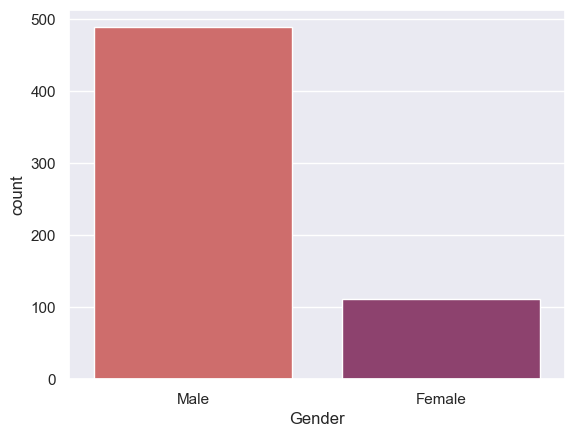

In [1761]:
genderAnalysis = loan_data.Gender.value_counts(dropna=False) #dropna false count none values as well when set to false 
print(genderAnalysis)

sns.countplot(x="Gender",data=loan_data,palette="flare")  #palatte gives us color and countplot count the number of values pf each unique value in column gender.
plt.show()

Married
Yes    398
No     213
NaN      3
Name: count, dtype: int64


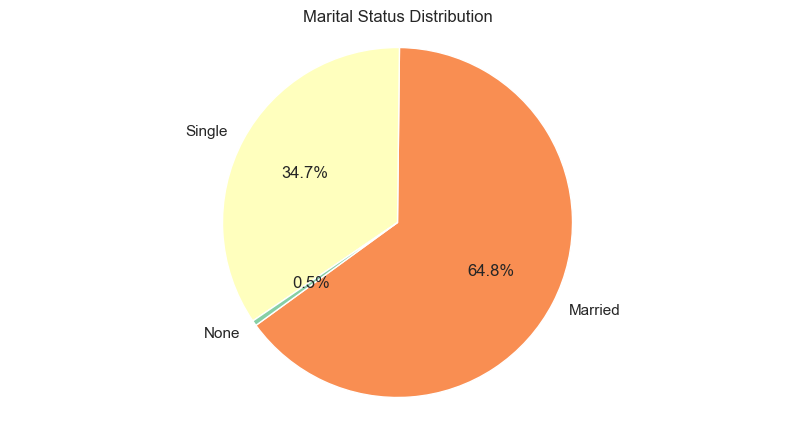

In [1762]:
maritalStatus = loan_data.Married.value_counts(dropna=False)
print(maritalStatus)

plt.figure(figsize=(10,5))

plt.pie(maritalStatus,
        labels=[("Married"),("Single"),("None")],
        startangle=216,
        autopct= '%1.1f%%', #this is used to show the percentage inside the chart upto 1 decimal place 
        colors=sns.color_palette("Spectral",len(maritalStatus))
)

plt.axis("equal") #This ensures that piechart is proper circle.
plt.title("Marital Status Distribution")
plt.show()

Dependents
0      345
1      102
2      101
3+      51
NaN     15
Name: count, dtype: int64


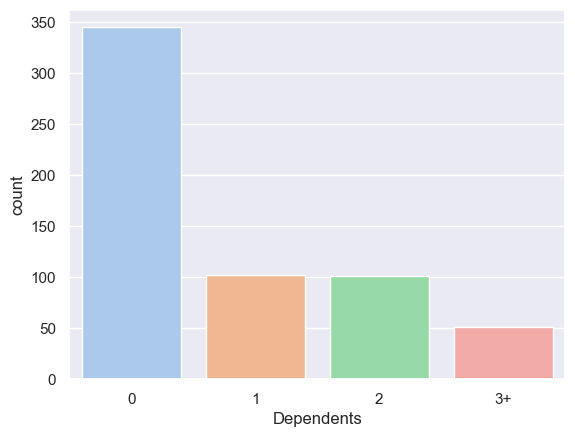

In [1763]:
DependentAnalysis = loan_data.Dependents.value_counts(dropna=False)
print(DependentAnalysis)

sns.countplot(x="Dependents",data=loan_data,palette='pastel')
plt.show()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


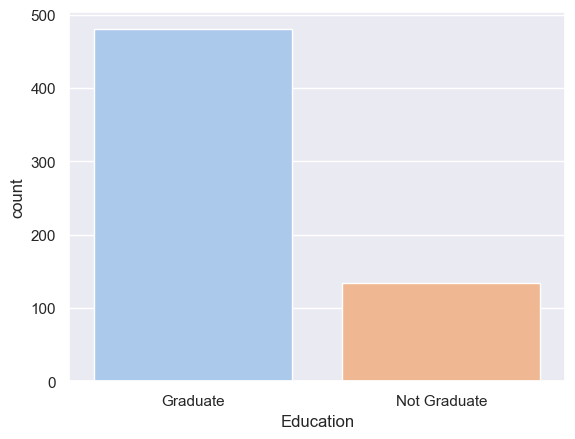

In [1764]:
EducationAnalysis = loan_data.Education.value_counts(dropna=False)
print(EducationAnalysis)

sns.countplot(x="Education",data=loan_data,palette="pastel")
plt.show()

Self_Employed
No     500
Yes     82
NaN     32
Name: count, dtype: int64


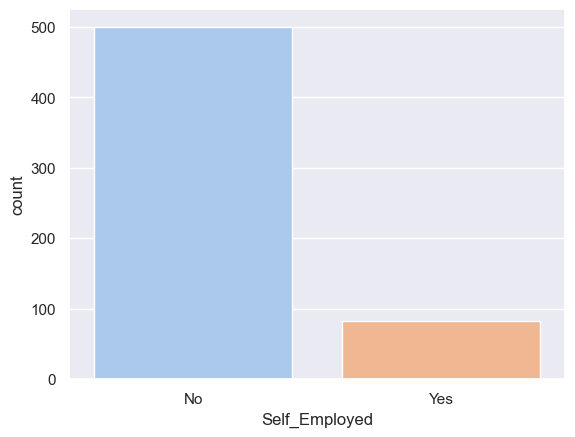

In [1765]:
selfEmployedAnalysis = loan_data.Self_Employed.value_counts(dropna=False)
print(selfEmployedAnalysis)

sns.countplot(x="Self_Employed",data=loan_data,palette="pastel")
plt.show()

Average income of Applicant : 5403.46
Number of people Above average: 176
Number of people below Average: 438


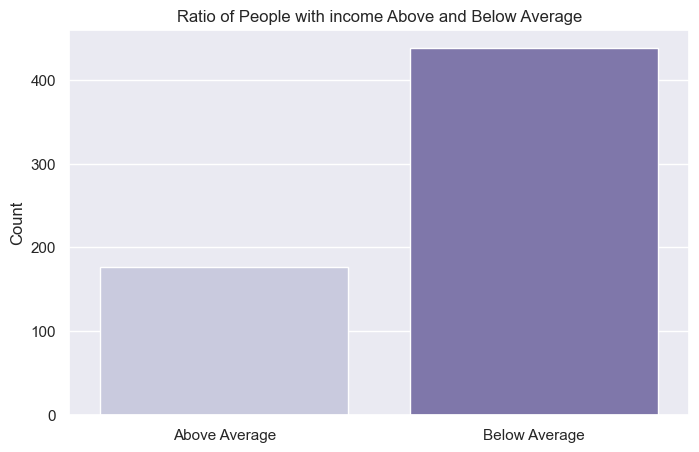

In [1766]:
average = loan_data['ApplicantIncome'].mean()
print(f"Average income of Applicant : {average:.2f}")

below_average = (loan_data['ApplicantIncome'] < average).sum()
above_average = (loan_data['ApplicantIncome'] > average).sum()

print(f"Number of people Above average: {above_average}")
print(f"Number of people below Average: {below_average}")

plt.figure(figsize=(8,5))
sns.barplot(x=["Above Average","Below Average"],y=[above_average,below_average],palette="Purples")
plt.title("Ratio of People with income Above and Below Average")
plt.ylabel('Count')
plt.show()

Credit_History
1.0    475
0.0     89
NaN     50
Name: count, dtype: int64


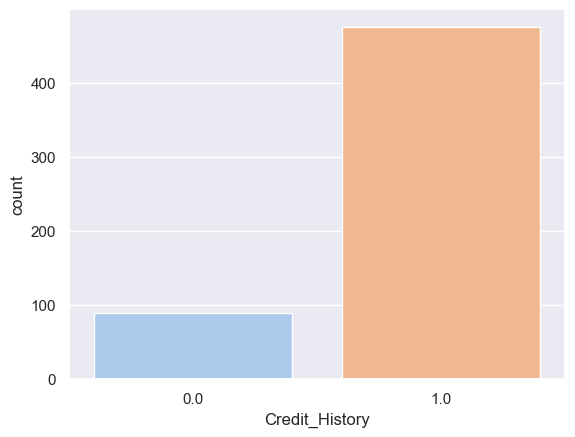

In [1767]:
creditHistoryAnalysis = loan_data.Credit_History.value_counts(dropna=False)
print(creditHistoryAnalysis)

sns.countplot(x="Credit_History",data=loan_data,palette="pastel")
plt.show()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64


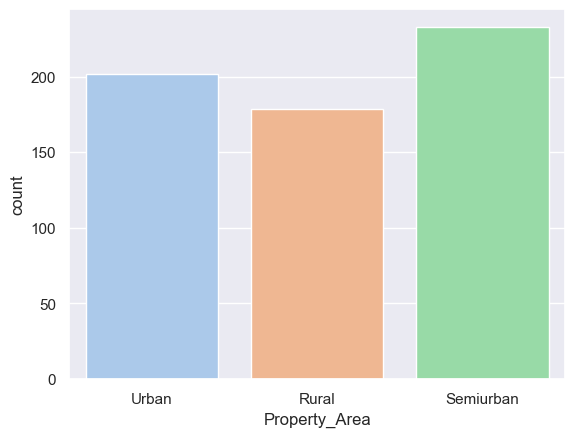

In [1768]:
propertyAreaAnalysis = loan_data.Property_Area.value_counts(dropna=False)
print(propertyAreaAnalysis)

sns.countplot(x="Property_Area",data=loan_data,palette="pastel")
plt.show()

Loan_Status
Y    428
N    186
Name: count, dtype: int64


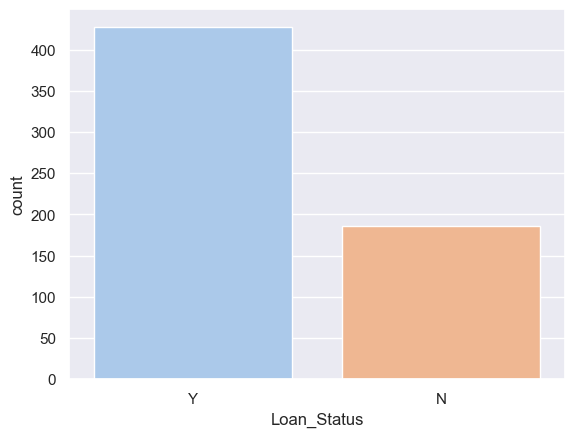

In [1769]:
LoanStatusAnalysis = loan_data.Loan_Status.value_counts(dropna=False)
print(LoanStatusAnalysis)

sns.countplot(x="Loan_Status",data=loan_data,palette="pastel")
plt.show()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
NaN       14
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64


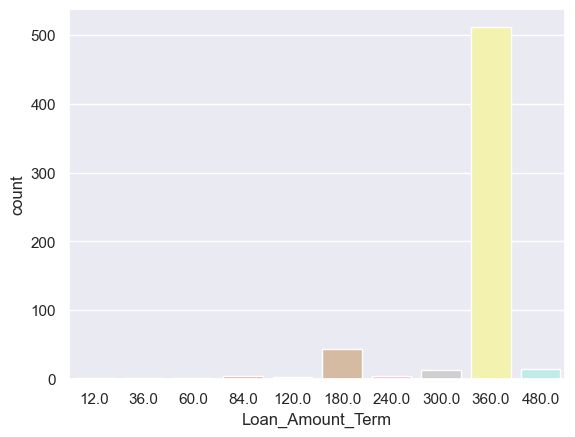

In [1770]:
LoanAmountTermAnalysis = loan_data.Loan_Amount_Term.value_counts(dropna=False)
print(LoanAmountTermAnalysis)

sns.countplot(x="Loan_Amount_Term",data=loan_data,palette="pastel")
plt.show()

In [1771]:
loan_data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


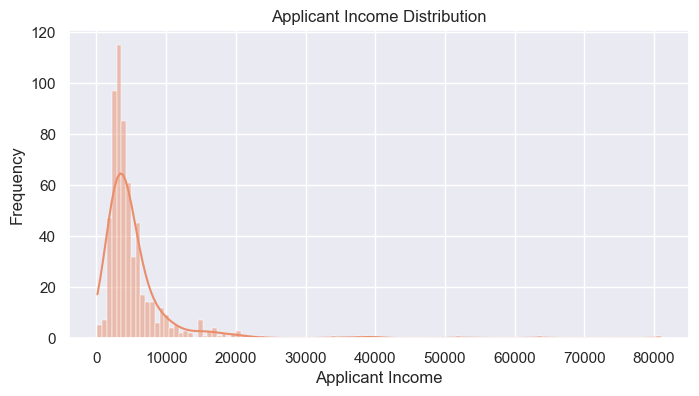

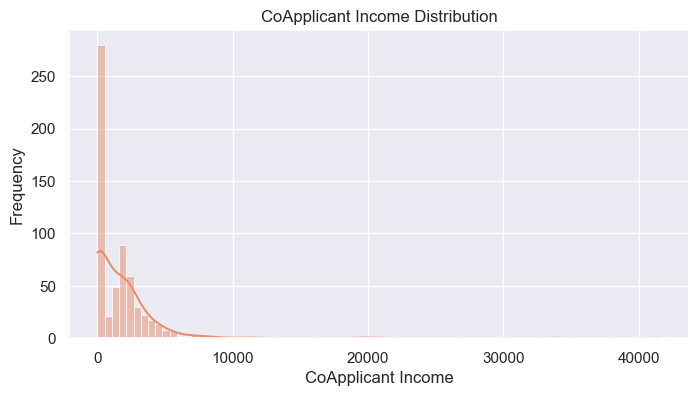

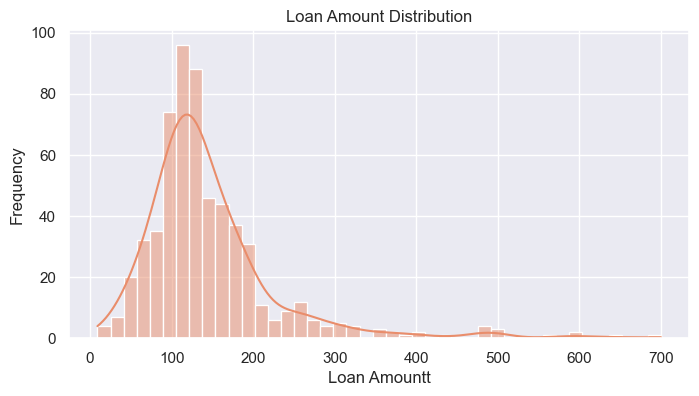

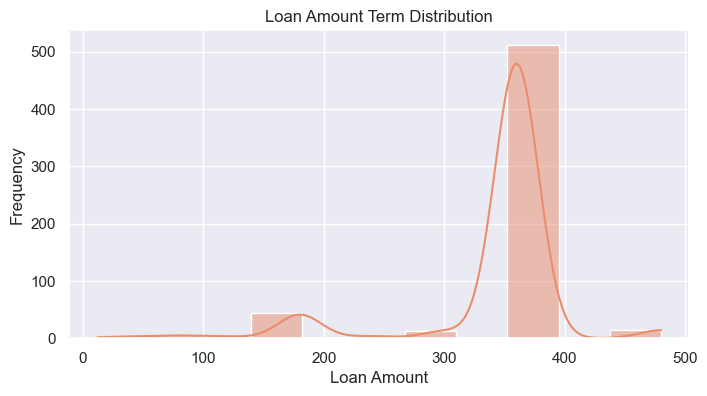

In [1772]:
#Histograms of numerical data 

plt.figure(figsize=(8,4))
sns.histplot(x="ApplicantIncome",data=loan_data,kde=True)
plt.xlabel("Applicant Income")
plt.ylabel("Frequency")
plt.title("Applicant Income Distribution")

plt.figure(figsize=(8,4))
sns.histplot(x="CoapplicantIncome",data=loan_data,kde=True)
plt.xlabel("CoApplicant Income")
plt.ylabel("Frequency")
plt.title("CoApplicant Income Distribution")

plt.figure(figsize=(8,4))
sns.histplot(x="LoanAmount",data=loan_data,kde=True)
plt.xlabel("Loan Amountt")
plt.ylabel("Frequency")
plt.title("Loan Amount Distribution")


plt.figure(figsize=(8,4))
sns.histplot(x="Loan_Amount_Term",data=loan_data,kde=True)
plt.xlabel("Loan Amount")

plt.ylabel("Frequency")
plt.title("Loan Amount Term Distribution")

plt.show()

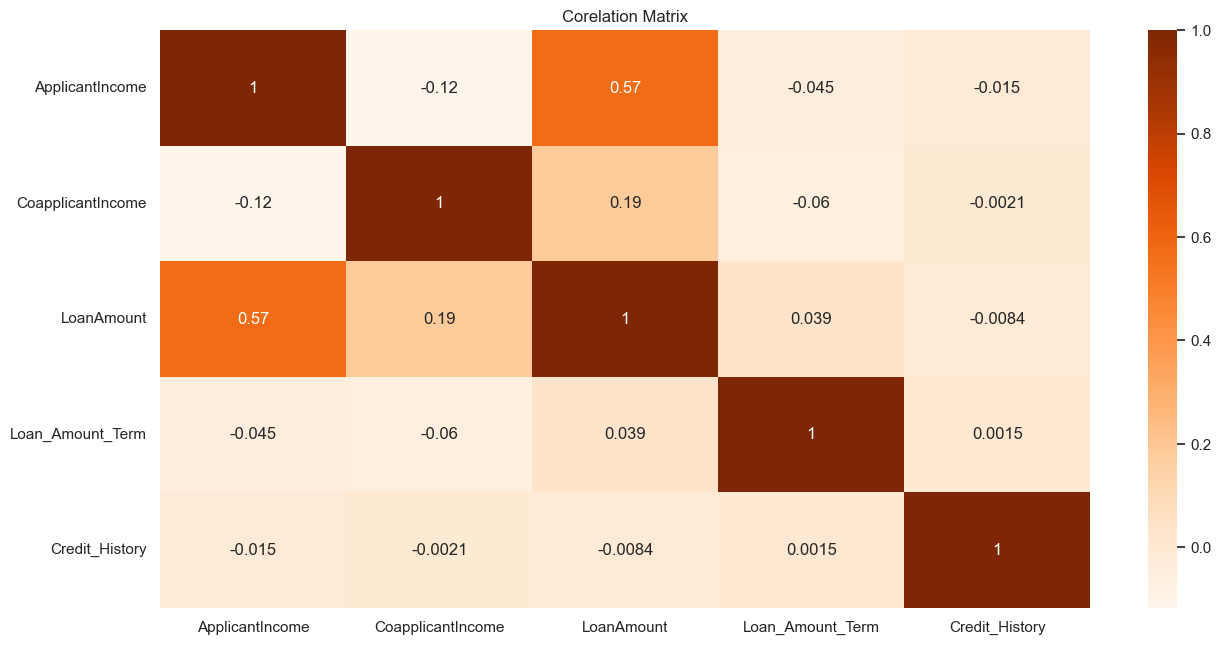

In [1773]:
# Corelation matrix  using heatmaps 

#calculating coefficient of corelation 

Co_relation = loan_data.corr(numeric_only=True)  #gives corelation matrix of numeric values only

plt.figure(figsize=(15,7.5))

sns.heatmap(Co_relation,annot=True,cmap="Oranges")
plt.title("Corelation Matrix")
plt.show()

RELATIONSHIP DATA

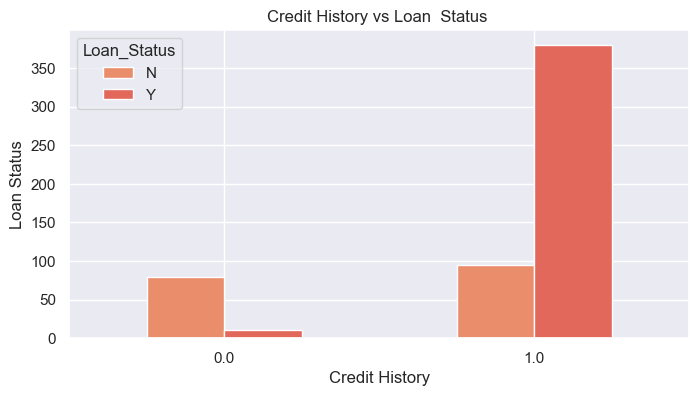

In [1774]:
pd.crosstab(loan_data.Credit_History,loan_data.Loan_Status).plot(kind="bar",figsize=(8,4))
plt.title("Credit History vs Loan  Status ")

plt.xlabel("Credit History")
plt.ylabel("Loan Status")

plt.xticks(rotation=0)
plt.show()

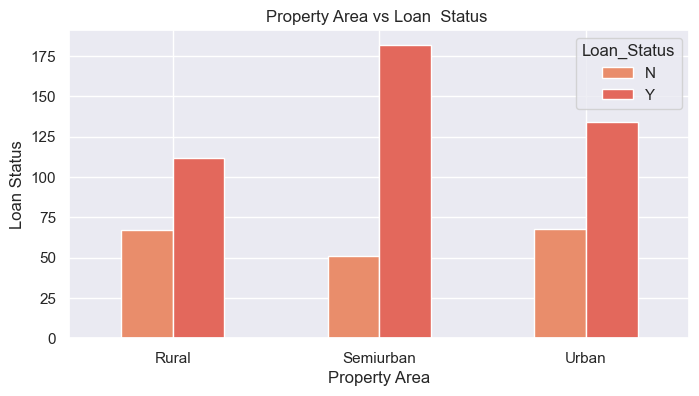

In [1775]:
pd.crosstab(loan_data.Property_Area,loan_data.Loan_Status).plot(kind="bar",figsize=(8,4))
plt.title("Property Area vs Loan  Status ")

plt.xlabel("Property Area")
plt.ylabel("Loan Status")

plt.xticks(rotation=0)
plt.show()

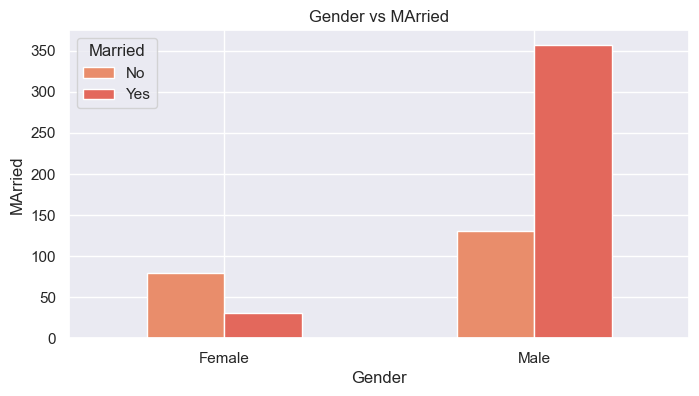

In [1776]:
pd.crosstab(loan_data.Gender , loan_data.Married).plot(kind="bar",figsize=(8,4))

plt.title("Gender vs MArried")

plt.xlabel("Gender")
plt.ylabel("MArried")
plt.xticks(rotation=0)
plt.show()

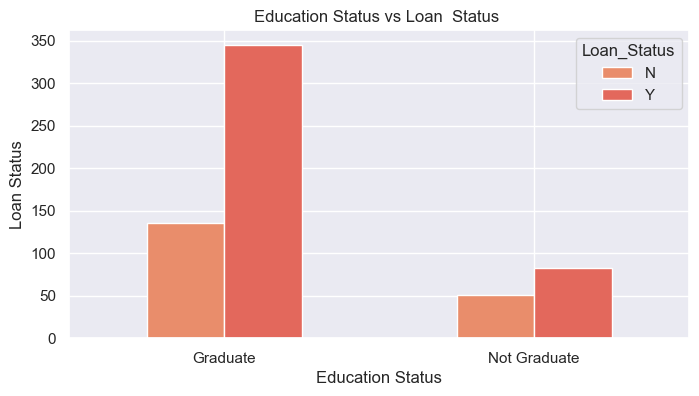

In [1777]:
pd.crosstab(loan_data.Education,loan_data.Loan_Status).plot(kind="bar",figsize=(8,4))
plt.title("Education Status vs Loan  Status ")

plt.xlabel("Education Status")
plt.ylabel("Loan Status")

plt.xticks(rotation=0)
plt.show()

In [1778]:
loan_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,Y
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


DATA CLEANING

In [1779]:
loan_data.drop("Loan_ID",axis=1,inplace=True)  #inplace means reflect this in origional 

In [1780]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [1781]:
loan_data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [1782]:
null_counts = loan_data.isnull().sum()
null_counts

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [1783]:
loan_data["Credit_History"] = loan_data["Credit_History"].fillna(loan_data["Credit_History"].mode()[0])
loan_data["LoanAmount"] = loan_data["LoanAmount"].fillna(loan_data["LoanAmount"].mean())
loan_data["Loan_Amount_Term"] = loan_data["Loan_Amount_Term"].fillna(loan_data["Loan_Amount_Term"].mode()[0])
loan_data["Gender"] = loan_data["Gender"].fillna(loan_data["Gender"].mode()[0])
loan_data["Married"] = loan_data["Married"].fillna(loan_data["Married"].mode()[0])
loan_data["Dependents"] = loan_data["Dependents"].fillna(loan_data["Dependents"].mode()[0])
loan_data["Self_Employed"] = loan_data["Self_Employed"].fillna(loan_data["Self_Employed"].mode()[0])


loan_data



,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,Y
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [1784]:

loan_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,Y
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


HANDLING OUTLINERS

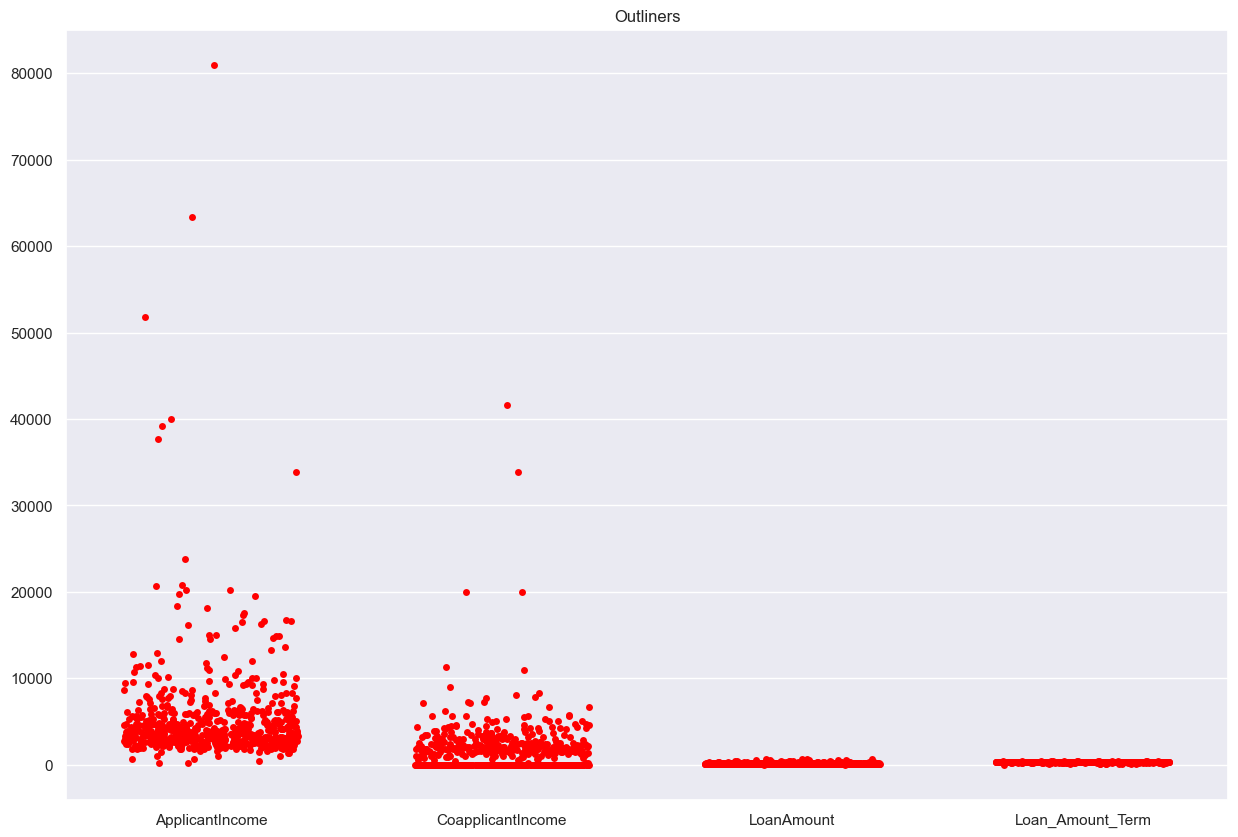

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,Y
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [1785]:
plt.figure(figsize=(15,10))

Outliners = loan_data.get(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'])

sns.stripplot(data=Outliners,color="red",jitter=0.3,size=5)

plt.title("Outliners")

plt.show()

loan_data

In [1786]:
loan_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,Y
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [1787]:
loan_data.ApplicantIncome = np.sqrt(loan_data.ApplicantIncome)
loan_data.CoapplicantIncome = np.sqrt(loan_data.CoapplicantIncome)
loan_data.LoanAmount = np.sqrt(loan_data.LoanAmount)

print(loan_data.shape)

(614, 12)


VISUALIZING DATA AGAIN AFTER HANDLING OUTLINERS

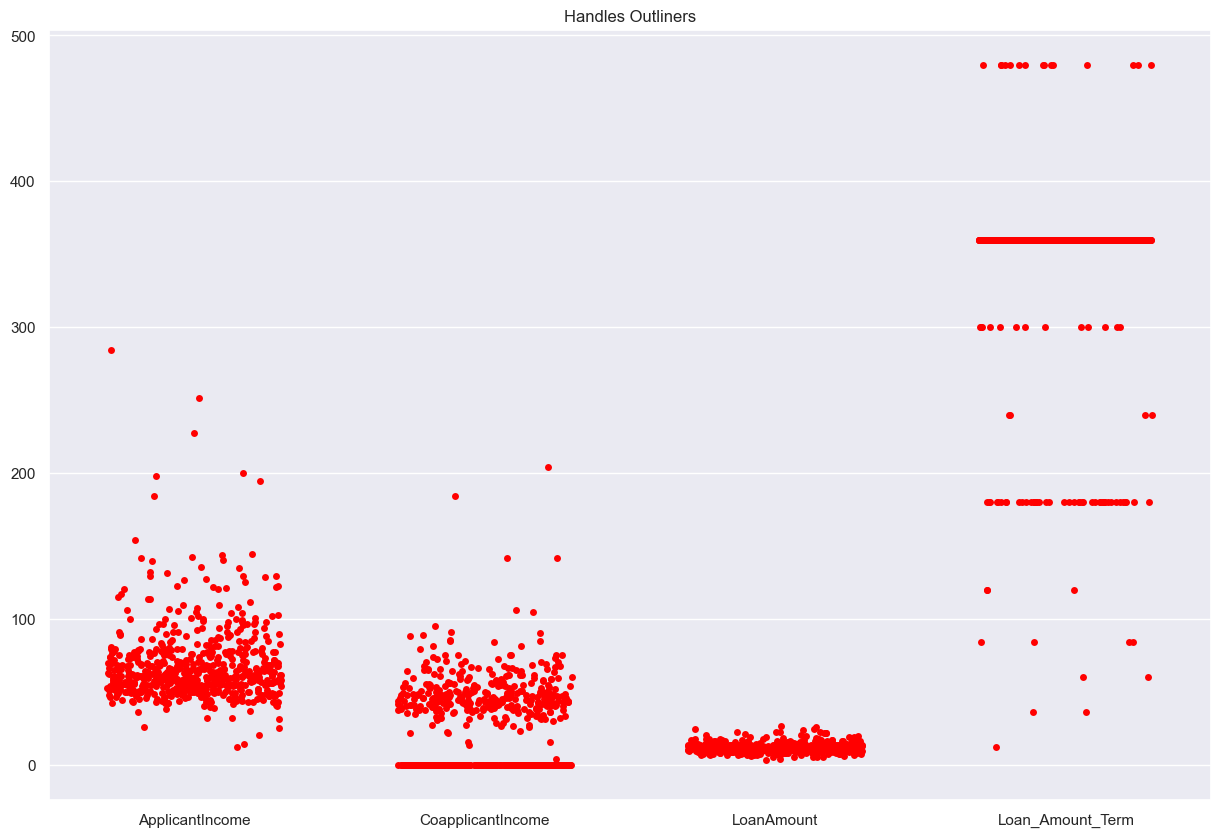

In [1788]:
plt.figure(figsize=(15,10))

outliners = loan_data.get(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'])

sns.stripplot(data=outliners,color="red",jitter=0.3,size=5)

plt.title("Handles Outliners")

plt.show()

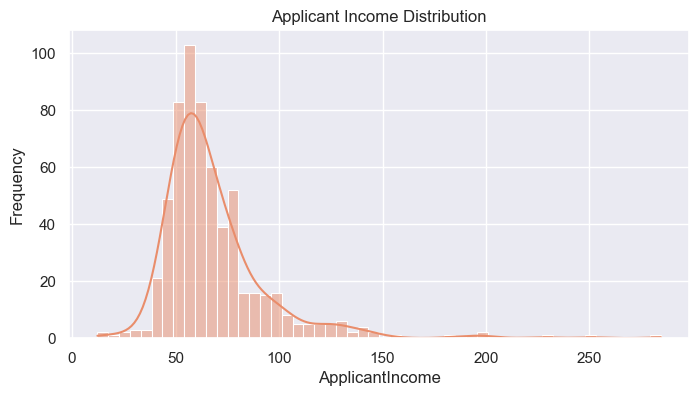

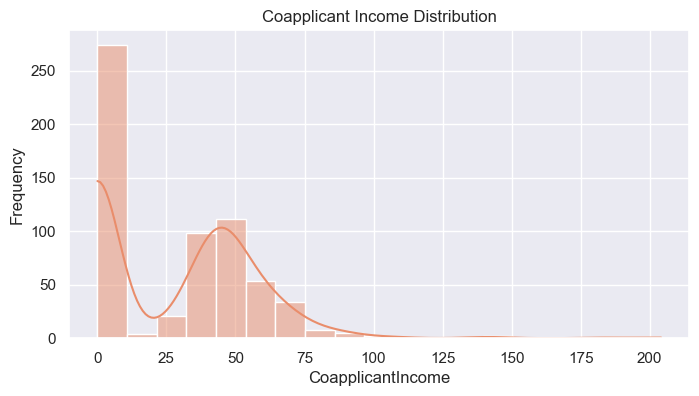

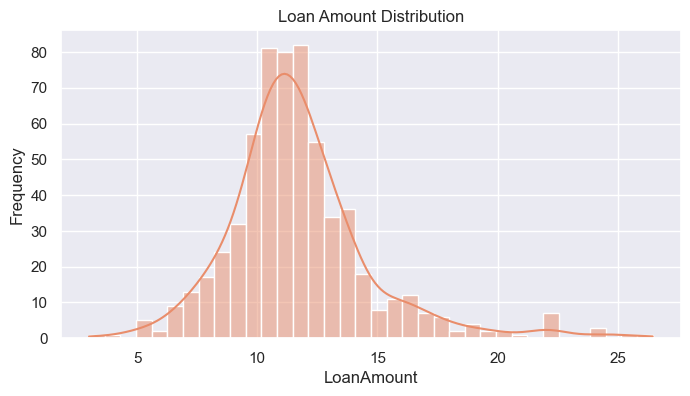

In [1789]:
sns.set_theme(palette='flare')

def plotDistribution(column,title):
    plt.figure(figsize=(8,4))
    sns.histplot(data=loan_data,x=column,kde=True)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()



plotDistribution('ApplicantIncome', "Applicant Income Distribution")
plotDistribution('CoapplicantIncome','Coapplicant Income Distribution')
plotDistribution('LoanAmount',"Loan Amount Distribution")


In [1790]:
columns_tocheck = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']

for column in columns_tocheck:
    duplicate_count=loan_data[column].duplicated().sum()

    if (duplicate_count==0):
        print(colored(f"No duplicate entries found in the {column} column.", "green", attrs=['reverse']))
    else:  
        print(colored(f"Number of duplicate entries found in the {column} column: {duplicate_count}", "cyan", attrs=['bold']))

    

Number of duplicate entries found in the ApplicantIncome column: 109
Number of duplicate entries found in the CoapplicantIncome column: 327
Number of duplicate entries found in the LoanAmount column: 410
Number of duplicate entries found in the Loan_Amount_Term column: 604
Number of duplicate entries found in the Credit_History column: 612


In [1791]:
loan_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,76.478755,0.000000,12.100089,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,67.697858,38.832976,11.313708,360.0,1.0,Rural,Y
2,Male,Yes,0,Graduate,Yes,54.772256,0.000000,8.124038,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,50.823223,48.559242,10.954451,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,77.459667,0.000000,11.874342,360.0,1.0,Urban,Y


DATA PREPROCESSING

In [1792]:
loan_data


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,76.478755,0.000000,12.100089,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,67.697858,38.832976,11.313708,360.0,1.0,Rural,Y
2,Male,Yes,0,Graduate,Yes,54.772256,0.000000,8.124038,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,50.823223,48.559242,10.954451,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,77.459667,0.000000,11.874342,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,53.851648,0.000000,8.426150,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,64.078077,0.000000,6.324555,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,89.844310,15.491933,15.905974,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,87.080423,0.000000,13.674794,360.0,1.0,Urban,Y


LABEL ENCODING

In [1793]:
from sklearn.preprocessing import LabelEncoder
le_gender = LabelEncoder()
le_married = LabelEncoder()
le_employed = LabelEncoder()
le_education = LabelEncoder()
le_dependent = LabelEncoder()
le_property_area = LabelEncoder()

loan_data['Gender'] = le_gender.fit_transform(loan_data['Gender'])
loan_data['Education'] = le_education.fit_transform(loan_data['Education'])
loan_data['Married'] = le_married.fit_transform(loan_data['Married'])
loan_data['Dependents'] = le_dependent.fit_transform(loan_data['Dependents'])
loan_data['Property_Area'] = le_property_area.fit_transform(loan_data['Property_Area'])
loan_data['Self_Employed'] = le_employed.fit_transform(loan_data['Self_Employed'])




In [1794]:
X = loan_data.drop('Loan_Status',axis=1)
Y = loan_data['Loan_Status']

In [1795]:
print(X.shape)
print(Y.shape)
loan_data['Loan_Status'].value_counts()

(614, 11)
(614,)


Loan_Status
Y    428
N    186
Name: count, dtype: int64

In [1796]:
#Min-Max Scaling: transforms the features so that they fall within a specified range, typically between 0 and 1

minmax=MinMaxScaler()
X = minmax.fit_transform(X)

In [1797]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,random_state=89,test_size=0.2)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)



print(Y_test.shape)

(491, 11)
(123, 11)
(491,)
(123,)


THE MOST ACCURATE MODEL FOR OUR CLASSIFICATION IS RANDOM FPOREST CLASSIFIER SO WE ARE USING THAT 

In [1798]:
from  sklearn.ensemble import RandomForestClassifier

for max_dep in range(1, 10):
    # Iterate over different values of random_state
    for rand_state in range(1, 50):
        # Iterate over different values of n_estimators
        for n_est in range(1, 30):
            # Create a Random Forest model with the different values of max_depth, random_state, and n_estimators
            model = RandomForestClassifier(n_estimators=n_est, random_state=rand_state, max_depth=max_dep)            
            
            
model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=9, n_estimators=29, random_state=49)

In [1799]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[17 20]
 [ 4 82]]


CHECKING ACCURACY

In [1800]:
from sklearn.metrics import accuracy_score

In [1801]:
y_pred = model.predict(X_test)
y_pred2= model.predict(X_train)
regressor = model 

In [1802]:
test_accuracy = accuracy_score(Y_test,y_pred)
print(colored(f"Test Accuracy of Model : {test_accuracy*100:.2f}%"))

Test Accuracy of Model : 80.49%


In [1803]:
training_accuracy = accuracy_score(Y_train,y_pred2)
print(colored(f"Training Accuracy of Model : {training_accuracy*100:.2f}%"))


Training Accuracy of Model : 89.00%


DEPLOYMENT OF MODEL 

In [1804]:
import pickle 

data = {"model" : regressor, "le_education":le_education, "le_dependent":le_dependent,"le_gender":le_gender,"le_married":le_married , "le_property_area":le_property_area,"le_employed":le_employed}
with open('model.pkl', 'wb') as file:
    pickle.dump(data,file)